In [115]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pickle
with open('panel_data.pickle', 'wb', -1) as handle:
    pickle.dump(panel_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('panel_data.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

In [116]:
df1 = pd.read_csv('people_count/people_newsys.csv', header=None)

In [117]:
df1.head(20)

,0,1,2,3,4
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens
5,2017-12-01 00:00:00,2017-12-01 00:15:00,0,1,Shoppers Ladies
6,2017-12-01 00:00:00,2017-12-01 00:15:00,4,13,Tim Hortons
7,2017-12-01 00:00:00,2017-12-01 00:15:00,4,13,Source
8,2017-12-01 00:00:00,2017-12-01 00:15:00,4,8,Ent A1 PB
9,2017-12-01 00:00:00,2017-12-01 00:15:00,0,5,Ent A3 Sport Chek


In [118]:
df1.columns = ['time_start', 'time_end', 'traffic_1', 'traffic_2', 'store_name']

In [119]:
df1.head()

,time_start,time_end,traffic_1,traffic_2,store_name
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens


In [120]:
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441821 entries, 0 to 441820
Data columns (total 5 columns):
time_start    441821 non-null object
time_end      441821 non-null object
traffic_1     441821 non-null int64
traffic_2     441821 non-null int64
store_name    441821 non-null object
dtypes: int64(2), object(3)
memory usage: 16.9+ MB


In [121]:
df1.dtypes

time_start    object
time_end      object
traffic_1      int64
traffic_2      int64
store_name    object
dtype: object

# Experiments

import dateutil
df1['date2'] = df1['time_start'].apply(dateutil.parser.parse, dayfirst=True)

df1.pivot_table('date', 'traffic_2', 'store_name').plot.bar()
doesn't work for now - no numeric types to aggregate

don't need this for now...
stores = df1[4].unique().tolist()
traffic = df1[3].tolist()
dates =  df1['date'].unique().tolist()
print(len(dates))
print(len(traffic))
print(min(df1['dates'])," to ",max(df1['dates']))
print(len(stores))

In [123]:
stores = df1['store_name'].unique().tolist()
for store in stores:
    print(store, '=' , df1['traffic_2'][df1['store_name'] == store].sum() )

Nadege Mens = 19886
Babaton Ladies = 146041
Ent H = 62300
Subway = 937491
Shoppers Mens = 92839
Shoppers Ladies = 135372
Tim Hortons = 1083874
Source = 1145263
Ent A1 PB = 344735
Ent A3 Sport Chek = 735572
Ent J3 Shoppers = 352678
Ent A2 Jamies = 275992
Holt Flow = 1092490
Go Transit = 131306
Scotia Flow = 1064227
Ent E = 79669
Ent G Microsoft = 328101
Harry Rosen Flow = 455034
E Parkade P1-N = 75623
Ent J1 = 84631
Starbucks Mens = 121926
Holt Renfrew Ext = 47662
E Parkade P2-S = 56663
E Parkade P4-S = 39889
E Parkade P5-S = 20704
Rest H CO = 178395
Pandora Mens = 144581
FC Ladies = 120919
E Parkade P1-S = 89987
F Parkade P1 = 255111
FC Elev N = 126461
E Parkade P3-N = 61516
FC Mens = 106876
Ent J2 = 49303
FC Elev S = 82778
E Parkade P4-N = 33815
E Parkade P5-N = 23026
Pandora Ladies = 198419
FC Esc N = 776381
Babaton Mens = 113983
Bvlgari Ladies = 127771
Bvlgari Mens = 109459
Starbucks Ladies = 140471
FC Emp Mens = 4322
Nadege Family = 7945
Starbucks Fam2 = 8299
Starbucks Fam1 = 10174

In [124]:
df1.dtypes

time_start    object
time_end      object
traffic_1      int64
traffic_2      int64
store_name    object
dtype: object

In [125]:
df1['day'] = pd.DatetimeIndex(df1['time_start']).day
df1['month'] = pd.DatetimeIndex(df1['time_start']).month
df1['year'] = pd.DatetimeIndex(df1['time_start']).year

In [126]:
import dateutil
df1['date'] = df1['time_start'].apply(dateutil.parser.parse, yearfirst=True)

In [130]:
df1['week'] = df1['date'].dt.week
df1.head(50)

,time_start,time_end,traffic_1,traffic_2,store_name,day,month,year,date,week
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens,1,12,2017,2017-12-01 00:00:00,48
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies,1,12,2017,2017-12-01 00:00:00,48
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H,1,12,2017,2017-12-01 00:00:00,48
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway,1,12,2017,2017-12-01 00:00:00,48
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens,1,12,2017,2017-12-01 00:00:00,48
5,2017-12-01 00:00:00,2017-12-01 00:15:00,0,1,Shoppers Ladies,1,12,2017,2017-12-01 00:00:00,48
6,2017-12-01 00:00:00,2017-12-01 00:15:00,4,13,Tim Hortons,1,12,2017,2017-12-01 00:00:00,48
7,2017-12-01 00:00:00,2017-12-01 00:15:00,4,13,Source,1,12,2017,2017-12-01 00:00:00,48
8,2017-12-01 00:00:00,2017-12-01 00:15:00,4,8,Ent A1 PB,1,12,2017,2017-12-01 00:00:00,48
9,2017-12-01 00:00:00,2017-12-01 00:15:00,0,5,Ent A3 Sport Chek,1,12,2017,2017-12-01 00:00:00,48


In [131]:
# plt.figure(figsize=(20,20))
# plt.plot( df1['day'], df1['traffic_2'])
# plt.show()

week1 = (df1['date'] > '2017-12-03') & (df1['date'] <= '2017-12-09')
week2 = (df1['date'] > '2017-12-10') & (df1['date'] <= '2017-12-16')
week3 = (df1['date'] > '2017-12-17') & (df1['date'] <= '2017-12-23')
week4 = (df1['date'] > '2017-12-24') & (df1['date'] <= '2017-12-30')
week5 = (df1['date'] > '2017-12-31') & (df1['date'] <= '2018-01-06')
week6 = (df1['date'] > '2018-01-07') & (df1['date'] <= '2018-01-13')
week7 = (df1['date'] > '2018-01-14') & (df1['date'] <= '2018-01-20')
week8 = (df1['date'] > '2018-01-21') & (df1['date'] <= '2018-01-27')
week9 = (df1['date'] > '2018-01-28') & (df1['date'] <= '2018-02-03')
week10 = (df1['date'] > '2018-02-04') & (df1['date'] <= '2018-02-10')
week11 = (df1['date'] > '2018-02-11') & (df1['date'] <= '2018-02-17')
week12 = (df1['date'] > '2018-02-18') & (df1['date'] <= '2018-02-24')

In [132]:
mens = ['Shoppers Mens','Nadege Mens','Harry Rosen Flow','Starbucks Mens','Pandora Mens','Bvlgari Mens','Babaton Mens','FC Mens','FC Emp Mens']
womens = ['Shoppers Ladies','Babaton Ladies','Holt Renfrew Ext','Holt Flow','FC Ladies','Pandora Ladies','Nadege Ladies','Starbucks Ladies',' Bvlgari Ladies','Pandora Nursing','FC Emp Ladies']
general = ['Subway','Tim Hortons','Source','Go Transit', 'Scotia Flow', 'Ent G Microsoft', 'Rest H CO', 'Nadege Family', 'Starbucks Fam2', 'Starbucks Fam1',
'Pandora Family','Nordstrom CO','Ent A3 Sport Chek','Ent J3 Shoppers','Ent A2 Jamies','Cheescake CO','Rest H Ext','Bay West J3']
parking =['FC Esc N','E Parkade P2-N','Ent E','F Parkade P2','E Parkade P3-S','Ent J2','FC Elev S','E Parkade P4-N',
'E Parkade P5-N','E Parkade P1-N','Ent J1','E Parkade P2-S','E Parkade P4-S','E Parkade P5-S','E Parkade P1-S','F Parkade P1',
'FC Elev N','E Parkade P3-N','Ent F Valet','E Parkade P1-E','F Parkade Holt P2','Nord P1 East','Bay North A1','F Parkade Holt P1','C Park Nord L2',
'E Parkade P5-E','E Parkade P4-E','C Park Nord L1','E Parkade P3-E','E Parkade P2-E','Ent H','Ent A1 PB'  ]

In [133]:
mens_data = df1[ df1['store_name'].isin(mens)]
# week1 = mens_data[(mens_data['date'] > '2017-12-03') & (mens_data['date'] <= '2017-12-09')]

In [134]:
# visit_mask = df1['traffic_2']
mens_mask = df1['store_name'].isin(mens)

In [135]:
df1['mens'] = df1['store_name'].isin(mens)
df1['womens'] = df1['store_name'].isin(womens)
df1['general'] = df1['store_name'].isin(general)
df1['parking'] = df1['store_name'].isin(parking)
df1[31950:32000]

,time_start,time_end,traffic_1,traffic_2,store_name,day,month,year,date,week,mens,womens,general,parking
31950,2017-12-07 10:15:00,2017-12-07 10:30:00,12,1,Holt Renfrew Ext,7,12,2017,2017-12-07 10:15:00,49,False,True,False,False
31951,2017-12-07 10:15:00,2017-12-07 10:30:00,4,2,FC Elev S,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31952,2017-12-07 10:15:00,2017-12-07 10:30:00,5,3,E Parkade P1-E,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31953,2017-12-07 10:15:00,2017-12-07 10:30:00,2,5,Nordstrom CO,7,12,2017,2017-12-07 10:15:00,49,False,False,True,False
31954,2017-12-07 10:15:00,2017-12-07 10:30:00,49,13,Bay North A1,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31955,2017-12-07 10:15:00,2017-12-07 10:30:00,6,4,Nord P1 East,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31956,2017-12-07 10:15:00,2017-12-07 10:30:00,45,58,Nordstrom CO,7,12,2017,2017-12-07 10:15:00,49,False,False,True,False
31957,2017-12-07 10:15:00,2017-12-07 10:30:00,9,0,E Parkade P2-S,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31958,2017-12-07 10:15:00,2017-12-07 10:30:00,8,0,F Parkade Holt P1,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31959,2017-12-07 10:15:00,2017-12-07 10:30:00,8,0,E Parkade P3-E,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True


In [163]:
traffic_men = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['mens']])['traffic_2'].sum().reset_index()
traffic_women = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['womens'] ])['traffic_2'].sum().reset_index()
traffic_men = traffic_men[ traffic_men.mens] # to extract only the values where mens==True
traffic_men.head(100)

,week,month,year,mens,traffic_2
1,1,1,2018,True,97418
3,2,1,2018,True,76808
5,3,1,2018,True,75892
7,4,1,2018,True,75104
9,5,1,2018,True,24018
11,5,2,2018,True,48909
13,6,2,2018,True,67268
15,7,2,2018,True,90741
17,8,2,2018,True,75934
19,9,2,2018,True,20105


In [165]:
traffic_men.drop(['mens'], axis=1,inplace=True)

In [166]:
traffic_men.rename(index=str, columns={'traffic_2':'men'})

,week,month,year,men
1,1,1,2018,97418
3,2,1,2018,76808
5,3,1,2018,75892
7,4,1,2018,75104
9,5,1,2018,24018
11,5,2,2018,48909
13,6,2,2018,67268
15,7,2,2018,90741
17,8,2,2018,75934
19,9,2,2018,20105


In [167]:
traffic_women = traffic_women[ traffic_women.womens] # to extract only the values where womens==True
traffic_women.rename(index=str, columns={'traffic_2':'women'})
traffic_women.head(100)

,week,month,year,womens,traffic_2
1,1,1,2018,True,159116
3,2,1,2018,True,121458
5,3,1,2018,True,124547
7,4,1,2018,True,123207
9,5,1,2018,True,40429
11,5,2,2018,True,79418
13,6,2,2018,True,109867
15,7,2,2018,True,147460
17,8,2,2018,True,122811
19,9,2,2018,True,32916


In [168]:
combined = traffic_men
combined.rename(index=str, columns={'traffic_2':'men'})

,week,month,year,men
1,1,1,2018,97418
3,2,1,2018,76808
5,3,1,2018,75892
7,4,1,2018,75104
9,5,1,2018,24018
11,5,2,2018,48909
13,6,2,2018,67268
15,7,2,2018,90741
17,8,2,2018,75934
19,9,2,2018,20105


In [169]:
combined.columns.tolist()

['week', 'month', 'year', 'traffic_2']

In [170]:
combined['women'] =  traffic_women['traffic_2']
combined.head(100)

,week,month,year,traffic_2,women
1,1,1,2018,97418,159116
3,2,1,2018,76808,121458
5,3,1,2018,75892,124547
7,4,1,2018,75104,123207
9,5,1,2018,24018,40429
11,5,2,2018,48909,79418
13,6,2,2018,67268,109867
15,7,2,2018,90741,147460
17,8,2,2018,75934,122811
19,9,2,2018,20105,32916


In [174]:
combined.rename(index=str, columns={'traffic_2':'men'},inplace=True)

In [178]:
combined.sort_values(by=['year', 'week'], inplace=True)

combined2 = traffic_men.append(traffic_women)
combined2.reset_index(drop=True)
combined2.head(100)

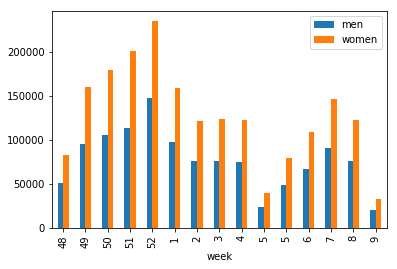

In [179]:
combined.plot(x='week', y=['men', 'women'], kind='bar')
plt.show()

In [186]:
total_traffic = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['parking']])['traffic_2'].sum().reset_index()
total_traffic = total_traffic[ total_traffic.parking]
total_traffic.rename(index=str, columns={'traffic_2':'visitors'},inplace=True)
total_traffic.head()

,week,month,year,parking,visitors
1,1,1,2018,True,249321
3,2,1,2018,True,196851
5,3,1,2018,True,200330
7,4,1,2018,True,191603
9,5,1,2018,True,61803


In [187]:
total_traffic.sort_values(by=['year', 'week'], inplace=True)

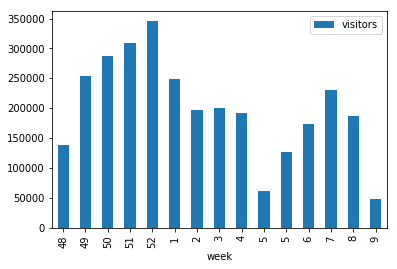

In [188]:
total_traffic.plot(x='week', y=['visitors'], kind='bar')
plt.show()

In [17]:
traffic_df = df1.groupby(['store_name', 'day', 'month'])['traffic_2'].sum().reset_index(name ='total_visitors')
traffic_df.head(10)

,store_name,day,month,total_visitors
0,Babaton Ladies,1,1,234
1,Babaton Ladies,1,2,1249
2,Babaton Ladies,1,12,2266
3,Babaton Ladies,2,1,2184
4,Babaton Ladies,2,2,1550
5,Babaton Ladies,2,12,2645
6,Babaton Ladies,3,1,1976
7,Babaton Ladies,3,2,2048
8,Babaton Ladies,3,12,2093
9,Babaton Ladies,4,1,1992


In [193]:
traffic_df.columns = ['store', 'day', 'month', 'total']
traffic_df.head(10)

,store,day,month,total
0,Babaton Ladies,1,1,234
1,Babaton Ladies,1,2,1249
2,Babaton Ladies,1,12,2266
3,Babaton Ladies,2,1,2184
4,Babaton Ladies,2,2,1550
5,Babaton Ladies,2,12,2645
6,Babaton Ladies,3,1,1976
7,Babaton Ladies,3,2,2048
8,Babaton Ladies,3,12,2093
9,Babaton Ladies,4,1,1992


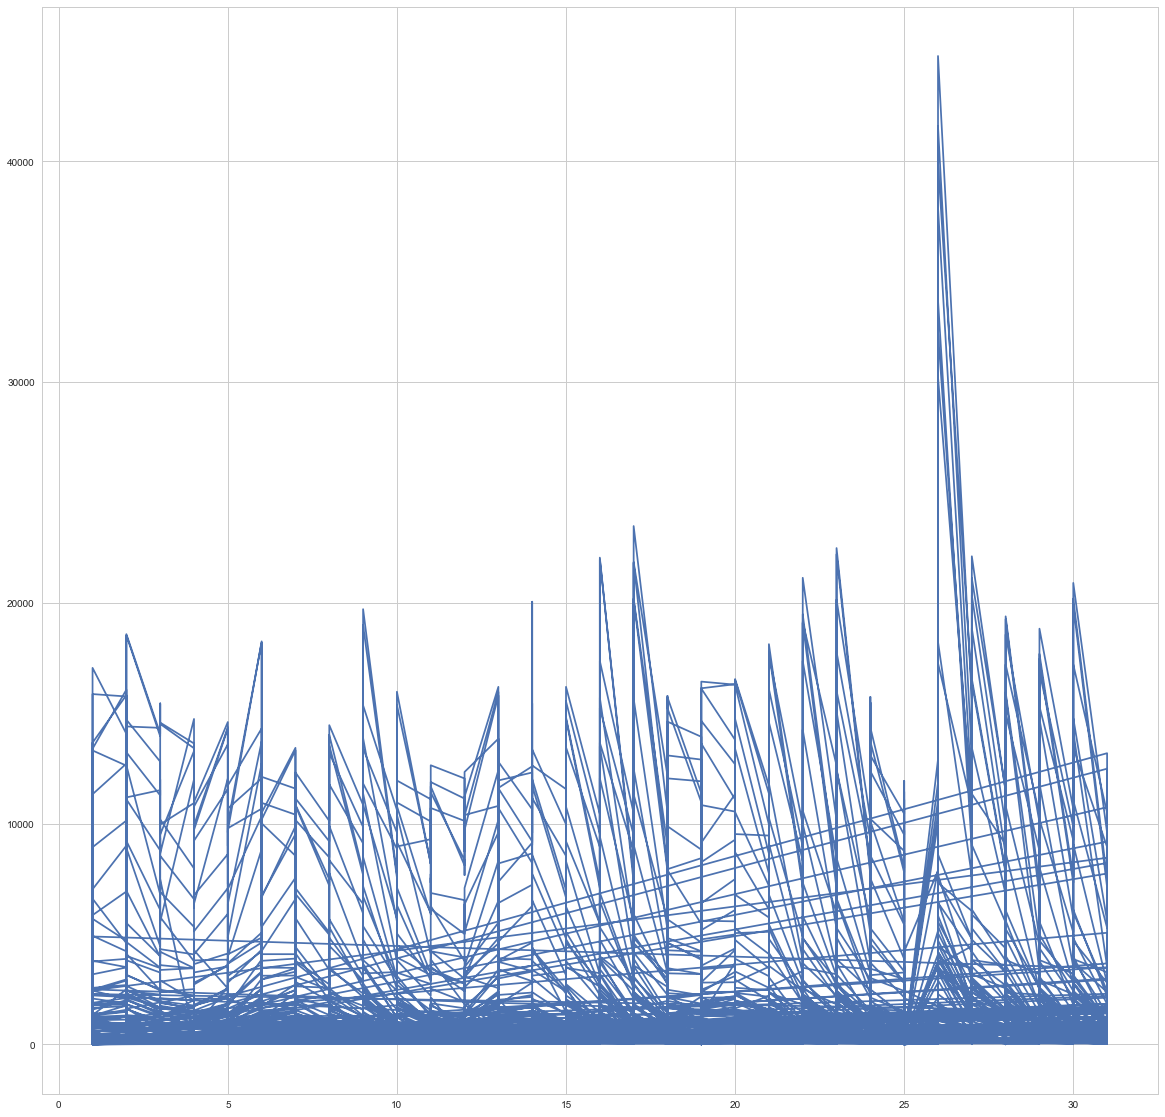

In [194]:
plt.figure(figsize=(20,20))
plt.plot( traffic_df['day'], traffic_df['total'])
plt.show()

In [198]:
traffic_df.plot.bar()

In [192]:
traffic_df2.columns = ['store', 'day', 'month', 'total']
traffic_df2.head(10)

,store,day,month,total
0,Babaton Ladies,1,1,234
1,Babaton Ladies,1,2,1249
2,Babaton Ladies,1,12,2266
3,Babaton Ladies,2,1,2184
4,Babaton Ladies,2,2,1550
5,Babaton Ladies,2,12,2645
6,Babaton Ladies,3,1,1976
7,Babaton Ladies,3,2,2048
8,Babaton Ladies,3,12,2093
9,Babaton Ladies,4,1,1992


In [153]:
def plot_bar_x():
#     index = np.arange(len(names))
    plt.bar(traffic_df['day'], traffic_df['total_visitors'])
    plt.xlabel('Store Name', fontsize=20)
    plt.ylabel('No of Visitors', fontsize=10)
#     plt.xticks(day, store_name, fontsize=40, rotation=90)
    plt.title('Visitors', fontsize=20)
#     plt.savefig('visitors.png', dpi=100)
    plt.show()

In [154]:
plot_bar_x()

NameError: name 'Figure' is not defined

In [40]:
store_names = ('Tim Hortons','Starbucks Ladies','Starbucks Fam1', 'Starbucks Fam2')

In [43]:
def bar_plot_fn(store):
    index = np.arange(len(time_periods))
    plt.plot(index, df1[3])
#     plt.xlabel('Store Name', fontsize=10)
#     plt.ylabel('No of Visitors', fontsize=10)
#     plt.xticks(index, fontsize=10, rotation=0)
#     plt.title('Visitors', fontsize=10)
#     plt.savefig('visitors.png', dpi=100)
    plt.show()

In [44]:
for store in store_names:
    bar_plot_fn(store)

ValueError: x and y must have same first dimension, but have shapes (8595,) and (441821,)

In [37]:
stores2 = df1[4].unique()
print(stores2)

['Nadege Mens' 'Babaton Ladies' 'Ent H' 'Subway' 'Shoppers Mens'
 'Shoppers Ladies' 'Tim Hortons' 'Source' 'Ent A1 PB' 'Ent A3 Sport Chek'
 'Ent J3 Shoppers' 'Ent A2 Jamies' 'Holt Flow' 'Go Transit' 'Scotia Flow'
 'Ent E' 'Ent G Microsoft' 'Harry Rosen Flow' 'E Parkade P1-N' 'Ent J1'
 'Starbucks Mens' 'Holt Renfrew Ext' 'E Parkade P2-S' 'E Parkade P4-S'
 'E Parkade P5-S' 'Rest H CO' 'Pandora Mens' 'FC Ladies' 'E Parkade P1-S'
 'F Parkade P1' 'FC Elev N' 'E Parkade P3-N' 'FC Mens' 'Ent J2' 'FC Elev S'
 'E Parkade P4-N' 'E Parkade P5-N' 'Pandora Ladies' 'FC Esc N'
 'Babaton Mens' 'Bvlgari Ladies' 'Bvlgari Mens' 'Starbucks Ladies'
 'FC Emp Mens' 'Nadege Family' 'Starbucks Fam2' 'Starbucks Fam1'
 'Nadege Ladies' 'Bay West J3' 'Pandora Nursing' 'E Parkade P2-N'
 'FC Emp Ladies' 'F Parkade P2' 'E Parkade P3-S' 'Pandora Family'
 'Nordstrom CO' 'Ent F Valet' 'E Parkade P1-E' 'F Parkade Holt P2'
 'Bay North A1' 'F Parkade Holt P1' 'Nord P1 East' 'C Park Nord L2'
 'E Parkade P5-E' 'E Parkade P4-

In [38]:
if store_names in stores2:
    print('yes')

C:\Users\User\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
print(df1.loc[df1[4]=='Tim Hortons'])

In [24]:
df1['Date']=pd.to_datetime(df1[0])
# df1['Date'] = df1[0].dt.date
# df1['Time'] = df1[0].dt.time
df1.head()

,0,1,2,3,4,Date
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens,2017-12-01
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies,2017-12-01
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H,2017-12-01
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway,2017-12-01
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens,2017-12-01


In [35]:
s = pd.to_datetime(df1[0], format='%Y %m %d %H:%M:%S')
df1.head()

,0,1,2,3,4,Date
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens,2017-12-01
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies,2017-12-01
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H,2017-12-01
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway,2017-12-01
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens,2017-12-01


In [38]:
df1['diff'] = pd.to_datetime(df1[1], format='%Y %m %d %H:%M:%S') - pd.to_datetime(df1[0], format='%Y %m %d %H:%M:%S')
df1.head()

,0,1,2,3,4,Date,diff
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens,2017-12-01,00:15:00
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies,2017-12-01,00:15:00
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H,2017-12-01,00:15:00
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway,2017-12-01,00:15:00
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens,2017-12-01,00:15:00


In [48]:
s = df1[4].unique()
for each in s:
    print(each)   

Nadege Mens
Babaton Ladies
Ent H
Subway
Shoppers Mens
Shoppers Ladies
Tim Hortons
Source
Ent A1 PB
Ent A3 Sport Chek
Ent J3 Shoppers
Ent A2 Jamies
Holt Flow
Go Transit
Scotia Flow
Ent E
Ent G Microsoft
Harry Rosen Flow
E Parkade P1-N
Ent J1
Starbucks Mens
Holt Renfrew Ext
E Parkade P2-S
E Parkade P4-S
E Parkade P5-S
Rest H CO
Pandora Mens
FC Ladies
E Parkade P1-S
F Parkade P1
FC Elev N
E Parkade P3-N
FC Mens
Ent J2
FC Elev S
E Parkade P4-N
E Parkade P5-N
Pandora Ladies
FC Esc N
Babaton Mens
Bvlgari Ladies
Bvlgari Mens
Starbucks Ladies
FC Emp Mens
Nadege Family
Starbucks Fam2
Starbucks Fam1
Nadege Ladies
Bay West J3
Pandora Nursing
E Parkade P2-N
FC Emp Ladies
F Parkade P2
E Parkade P3-S
Pandora Family
Nordstrom CO
Ent F Valet
E Parkade P1-E
F Parkade Holt P2
Bay North A1
F Parkade Holt P1
Nord P1 East
C Park Nord L2
E Parkade P5-E
E Parkade P4-E
C Park Nord L1
E Parkade P3-E
E Parkade P2-E
Cheescake CO
Rest H Ext


In [58]:
a = ( df1.groupby(4)[2].sum().reset_index())
b = ( df1.groupby(4)[3].sum().reset_index())
print(a,b)
names = a[4].values
visitors = a[2].values
customers = a[2].values

                    4        2
0      Babaton Ladies   146138
1        Babaton Mens   113940
2        Bay North A1   186756
3         Bay West J3   143619
4      Bvlgari Ladies   127167
5        Bvlgari Mens   109331
6      C Park Nord L1    22440
7      C Park Nord L2     5351
8        Cheescake CO   243715
9      E Parkade P1-E    47302
10     E Parkade P1-N    75976
11     E Parkade P1-S    84336
12     E Parkade P2-E    34840
13     E Parkade P2-N    80207
14     E Parkade P2-S    54530
15     E Parkade P3-E    37708
16     E Parkade P3-N    60249
17     E Parkade P3-S    49364
18     E Parkade P4-E    12486
19     E Parkade P4-N    28252
20     E Parkade P4-S    37283
21     E Parkade P5-E     6325
22     E Parkade P5-N    18898
23     E Parkade P5-S    19064
24          Ent A1 PB   311115
25      Ent A2 Jamies   278019
26  Ent A3 Sport Chek   705983
27              Ent E    90473
28        Ent F Valet    76429
29    Ent G Microsoft   315546
..                ...      ...
40      

# A very basic plot
fig = plt.plot(names, visitors, names, customers)
plt.rcParams["figure.figsize"] = [100,20]
plt.xticks(fontsize='large',rotation=90)
plt.show()

# This code is ok for sub plots with dots vs dashes for visitors vs customers
fig, ax = plt.subplots()
ax.plot(visitors,'ro',label="Visitors")
ax.plot(customers,'b-',label='Customers')
plt.ylabel('Numbers')
ax.set_xticklabels(names, fontsize = 'large', rotation=90)
plt.show()

In [134]:
def plot_bar_x():
    index = np.arange(len(names))
    plt.bar(index, visitors)
    plt.xlabel('Store Name', fontsize=40)
    plt.ylabel('No of Visitors', fontsize=5)
    plt.xticks(index, names, fontsize=40, rotation=90)
    plt.title('Visitors', fontsize=40)
    plt.savefig('visitors.png', dpi=100)
    plt.show()

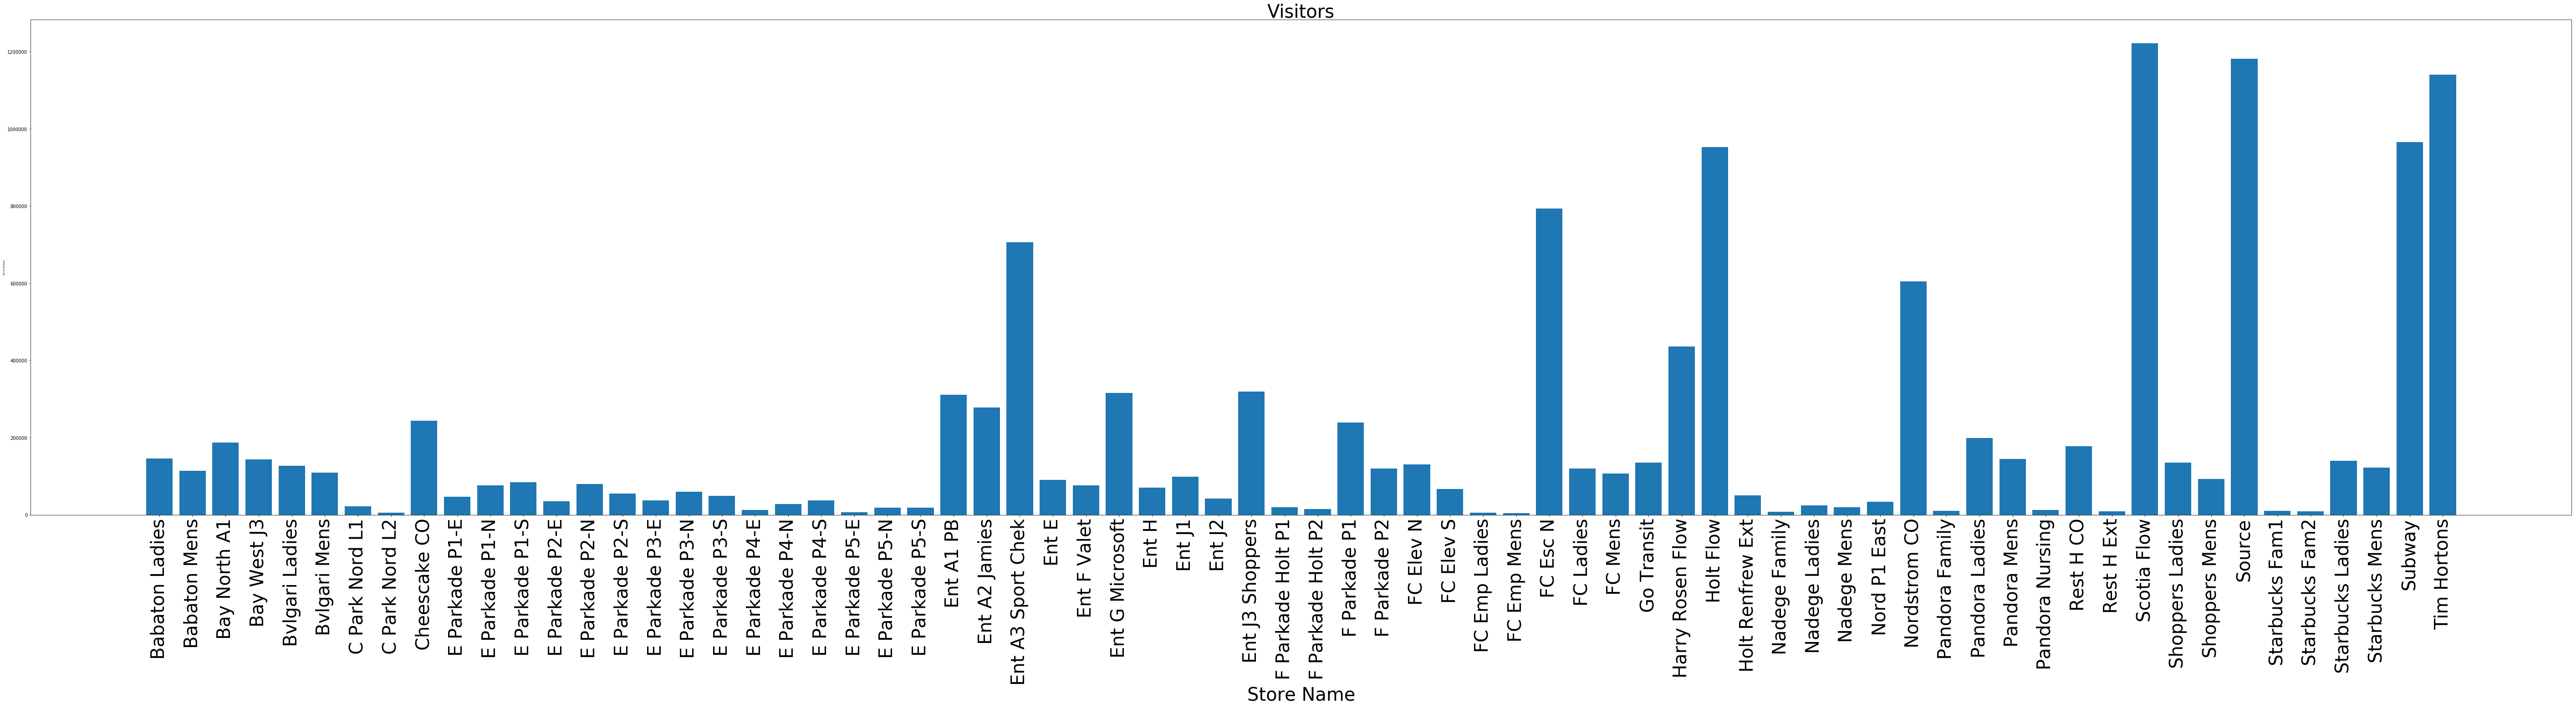

In [135]:
plot_bar_x()

In [ ]:
df2 = pd.read_csv('people_count/people_oldsys_1.csv')

In [13]:
df2.head()

,2016-12-01 00:00:00,2016-12-01 00:15:00,1,1.1,Ent E
0,2016-12-01 00:00:00,2016-12-01 00:15:00,1,3,Ent G Microsoft
1,2016-12-01 00:00:00,2016-12-01 00:15:00,11,14,Tim Hortons
2,2016-12-01 00:00:00,2016-12-01 00:15:00,17,18,Source
3,2016-12-01 00:00:00,2016-12-01 00:15:00,8,7,Ent A3 Sport Chek
4,2016-12-01 00:00:00,2016-12-01 00:15:00,0,10,Ent A3 Sport Chek
